# 03. Hands On: Data Exploration

## 1 Summarization

Load the data set carIns final. It already has the imputation of missing values.

In [2]:
#Load the data set
load("C:/Users/pcuser/Documents/GitHub/hands-on-2023A/data/03_dataexploration/carIns_final.Rdata")

head(carIns_final,5)

symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,...,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
1,161,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


### 1. Using the package dplyr, answer the following questions:

In [3]:
#Load packages
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



#### (a) Obtain the number of cars by bodyStyle.

In [4]:
carIns_final %>% group_by(bodyStyle) %>% count()

bodyStyle,n
convertible,6
hardtop,8
hatchback,70
sedan,96
wagon,25


#### (b) Obtain the number of cars by bodyStyle and fuelType.

In [9]:
carIns_final  %>% group_by(bodyStyle, fuelType) %>% count()

bodyStyle,fuelType,n
convertible,gas,6
hardtop,diesel,1
hardtop,gas,7
hatchback,diesel,1
hatchback,gas,69
sedan,diesel,15
sedan,gas,81
wagon,diesel,3
wagon,gas,22


#### (c) Obtain the mean and the standard deviation of the attribute cityMpg by bodyStyle in ascending order.

In [10]:
carIns_final %>% group_by(bodyStyle) %>% summarize (cityMpg.mean=mean(cityMpg), cityMpg.sd=sd(cityMpg)) %>%
arrange(cityMpg.mean)

bodyStyle,cityMpg.mean,cityMpg.sd
convertible,20.50000,3.391165
hardtop,21.62500,5.423165
wagon,24.04000,4.217819
sedan,25.32292,6.599035
hatchback,26.31429,7.169870


#### (d) Also by bodyStyle, and for the attributes cityMpg and highwayMpg, obtain the mean, the standard deviation, the median and the inter-quartile range.

In [11]:
carIns_final %>% group_by(bodyStyle) %>% summarize (cityMpg.mean=mean(cityMpg), cityMpg.sd=sd(cityMpg),
                                                    highwayMpg.median=median( highwayMpg), cityMpg.iqr = IQR(cityMpg))

bodyStyle,cityMpg.mean,cityMpg.sd,highwayMpg.median,cityMpg.iqr
convertible,20.50000,3.391165,27.0,5.25
hardtop,21.62500,5.423165,27.5,7.00
hatchback,26.31429,7.169870,31.5,12.00
sedan,25.32292,6.599035,30.5,11.25
wagon,24.04000,4.217819,29.0,5.00


## 2 Visualization

### 2. Using the package ggplot2, create graphs that you find adequate to answer the following questions.

In [13]:
install.packages("ggplot2")


also installing the dependencies 'cli', 'farver', 'isoband', 'lifecycle', 'rlang', 'scales', 'vctrs', 'withr'




  There are binary versions available but the source versions are later:
          binary source needs_compilation
cli        2.5.0  3.6.1              TRUE
farver     2.1.0  2.1.1              TRUE
isoband    0.2.4  0.2.7              TRUE
lifecycle  1.0.0  1.0.3             FALSE
rlang     0.4.11  1.1.1              TRUE
scales     1.1.1  1.2.1             FALSE
vctrs      0.3.8  0.6.2              TRUE
withr      2.4.2  2.5.0             FALSE
ggplot2    3.3.3  3.4.2             FALSE

  Binaries will be installed
package 'cli' successfully unpacked and MD5 sums checked
package 'farver' successfully unpacked and MD5 sums checked
package 'isoband' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked
package 'vctrs' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pcuser\AppData\Local\Temp\RtmpwPBsxf\downloaded_packages


installing the source packages 'lifecycle', 'scales', 'withr', 'ggplot2'

Warning message in install.packages("ggplot2"):
"installation of package 'lifecycle' had non-zero exit status"Warning message in install.packages("ggplot2"):
"installation of package 'scales' had non-zero exit status"Warning message in install.packages("ggplot2"):
"installation of package 'ggplot2' had non-zero exit status"

In [15]:
library(ggplot2)

#### (e) Show the relationship between the attributes cityMpg and highwayMpg

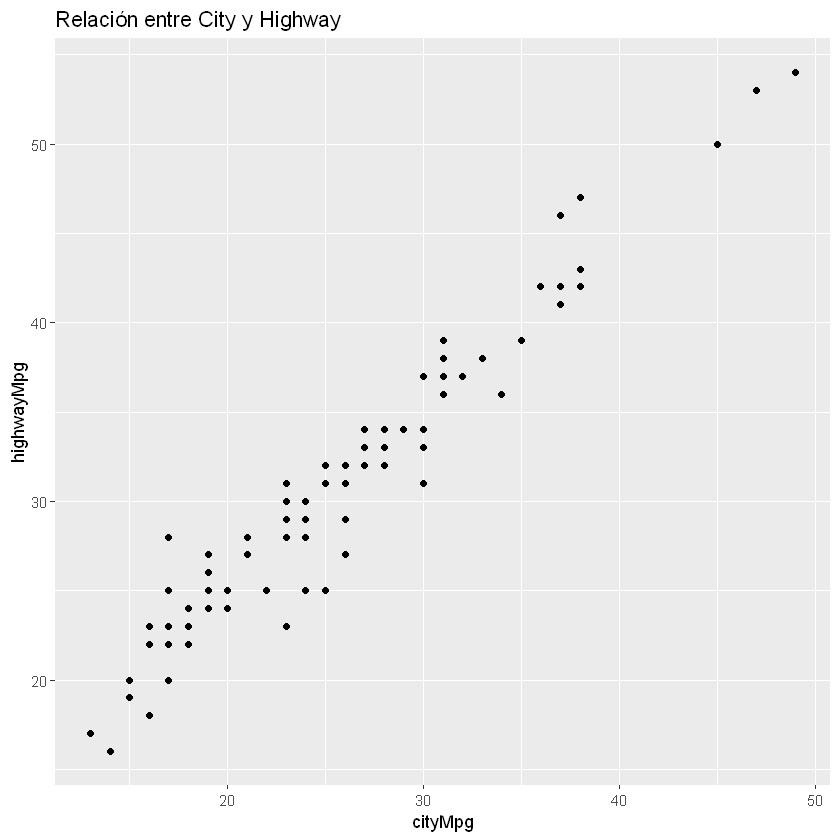

In [16]:
ggplot(carIns_final,aes(x=cityMpg, y=highwayMpg))+geom_point()+ggtitle("Relación entre City y Highway")

#### (f) Show the distribution of cars by bodyStyle.

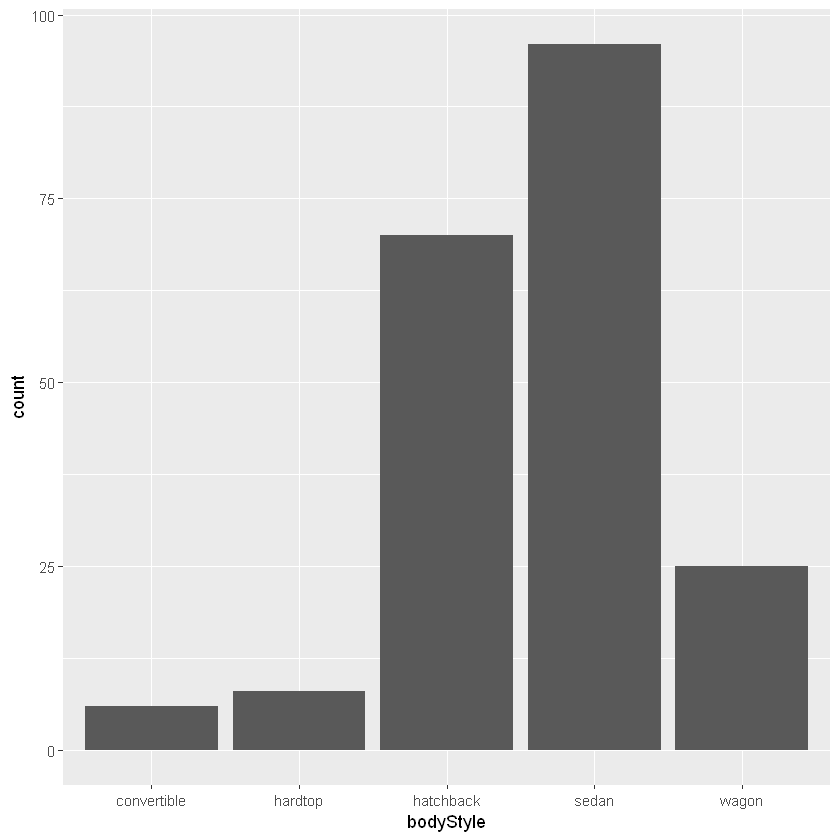

In [22]:
ggplot(carIns_final, aes(x=bodyStyle))+geom_bar()

#### (g) Show the distribution of cars by price. Suggestion: create bins of width equal to 5000.

crear nueva columna, numerico a categorico, histograma

#### (h) Add the information of the density estimation to the previous graph.

#### (i) Check (visually) if it is plausible to consider that price follows a normal distribution.

#### (j) Show the distribution of price by make attribute. Suggestion: use boxplots and the function coord_flip().

#### (k) Show the distribution of price by nDoors attribute. Suggestion: use histograms.

#### (l) Show the distribution of price by bodyStyle and nDoors attributes. Suggestion: use histograms.

#### (m) Add the parameter scales="free_y" to the facet function in the previous graph.

#### 